In [25]:
# Notebook: Venn DMPs in TSS
# Description: Notebook contains analysis of overlapping DMPs [and annotated genes] localized in
# TSS200 or TSS1500 between all study groups.

In [26]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [27]:
import math
import itertools

import pandas as pd
from venn import venn

import numpy as np, scipy.stats as st
from src.enrichment_analysis import EnrichmentAnalysis
from src.utils import EPIC

pd.options.mode.chained_assignment = None

In [28]:
def extract(df, threshold=0.1, alpha=0.05):
    """Function to extract CpGs from report"""
    df = df[(df["Delta mean"].abs() > threshold) & (df["q-value"] <= alpha)]

    return set(df.index)

In [29]:
# Load raw reports

# Covid groups vs healthy blood controls
spain = pd.read_csv("statistics/output/SpainCoV_vs_HB_TSS.csv", index_col=0)
usa = pd.read_csv("statistics/output/USACoV_vs_HB_TSS.csv", index_col=0)
pl = pd.read_csv("statistics/output/PLCoV_vs_HB_TSS.csv", index_col=0)

# usa covid vs usa non-covid controls
nonCov = pd.read_csv("statistics/output/USANoNCoV_vs_CoV_TSS.csv", index_col=0)

In [10]:
# Intersection between Covid groups USA SPAIN PL

In [30]:
intersect = set.intersection(set(spain.index), set(pl.index), set(usa.index))

spain = extract(spain.loc[intersect])
pl = extract(pl.loc[intersect])
usa = extract(usa.loc[intersect])

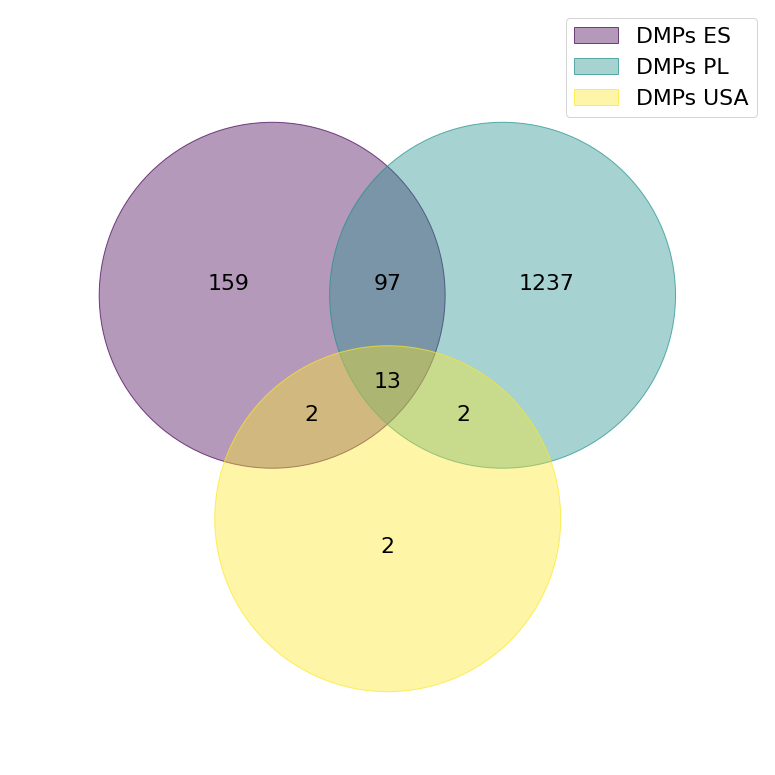

In [31]:
fig = venn(
    {
        "DMPs ES": spain,
        "DMPs PL": pl,
        "DMPs USA": usa,
    },
    figsize=(14, 14),
    fontsize=22,
)

fig.figure.savefig("../Plots/VennAllCoVGroupsTSS.jpg")

In [32]:
# Save intersection

intersection = list(set.intersection(spain, pl, usa))

intersection = pd.DataFrame(intersection, columns=["CpG"])
print(intersection)

intersection.to_csv("../Files/DMPs_In_All_CoV_Groups_TSS.csv")

           CpG
0   cg03782202
1   cg22930808
2   cg19556901
3   cg25060243
4   cg12981595
5   cg24315703
6   cg21581312
7   cg13407664
8   cg18642567
9   cg21465162
10  cg17515347
11  cg21673175
12  cg08585897


In [16]:
# Overlap genes annotated to DMPs betwen covid groups

In [ ]:
# Load epic manifest

epic = pd.read_csv(
    "../data/additional/EPIC/MethylationEPIC_v-1-0_B4.csv",
    index_col=0,
    low_memory=False,
)

In [ ]:
# Extract genes annotated to DMPs

# Spain
spain_selected_genes = EPIC.extract_genes(
    epic.loc[spain, "UCSC_RefGene_Name"]
)  # Extract genes

# PL
pl_selected_genes = EPIC.extract_genes(epic.loc[pl, "UCSC_RefGene_Name"])

# USA
usa_selected_genes = EPIC.extract_genes(epic.loc[usa, "UCSC_RefGene_Name"])

# Convert to set
spain_selected_genes = set(spain_selected_genes.Genes)
pl_selected_genes = set(pl_selected_genes.Genes)
usa_selected_genes = set(usa_selected_genes.Genes)

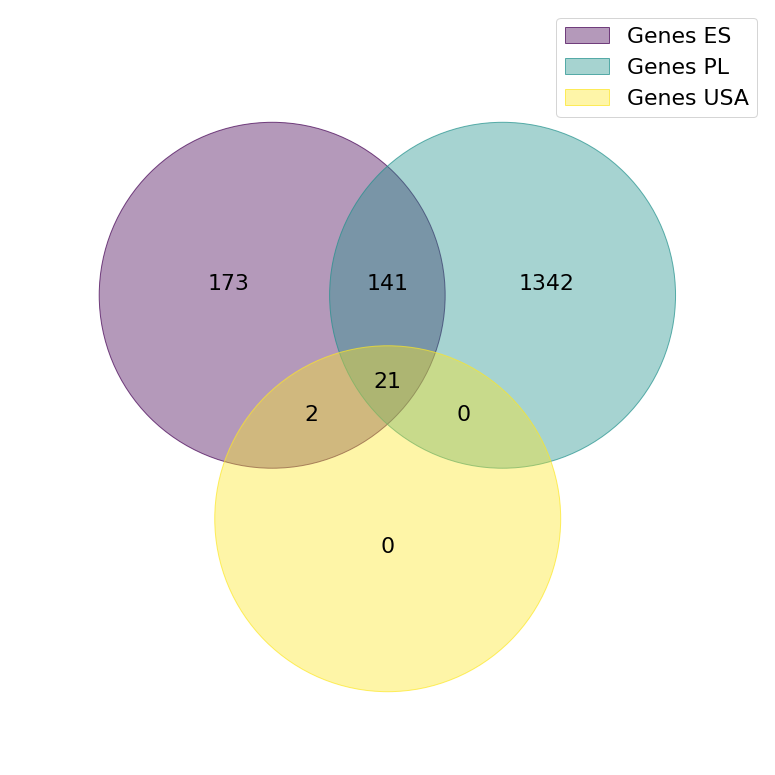

In [ ]:
fig = venn(
    {
        "Genes ES": spain_selected_genes,
        "Genes PL": pl_selected_genes,
        "Genes USA": usa_selected_genes,
    },
    figsize=(14, 14),
    fontsize=22,
)

fig.figure.savefig("../Plots/VennDMGenesAllCoVGroups.jpg")

In [15]:
# Export intersection

In [36]:
summary = pd.concat(
    (epic.loc[intersection.CpG, ["UCSC_RefGene_Name", "UCSC_RefGene_Group"]],), axis=1
)

summary = EPIC.extract_probes_in_specific_region(summary, ["TSS200", "TSS1500"])
summary.to_csv("../Files/DMGenes_In_All_CoV_Groups.csv")
summary

cg03782202        HOXD11
cg22930808         DTX3L
cg19556901    SNORD115-1
cg25060243        UGT1A4
cg12981595      KRTAP4-8
cg24315703         LIMK2
cg21581312     LOC723972
cg13407664          HTN1
cg18642567       RPGRIP1
cg21465162        UBQLN1
cg17515347          AIM2
cg21673175     LOC401010
cg08585897       TERF2IP
Name: UCSC_RefGene_Name, dtype: object